**Loading MNIST data**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

input_shape = train_images.shape[1]  # Use the actual shape of your data

#**************** Sequential Model 2**************************
model_1 = keras.Sequential([
        layers.Dense(64, activation="relu"), 
        layers.Dense(10, activation="softmax")
    ])

#**************** Sequential Model 2**************************
model_2 = keras.Sequential()  
model_2.add(layers.Dense(64, activation="relu"))
model_2.add(layers.Dense(10, activation="softmax"))


#**************** Functional API Model **************************
inputs    = keras.Input(shape=(input_shape,))
features1 = layers.Dense(64, activation="relu")(inputs)
outputs   = layers.Dense(10, activation="softmax")(features1)
model_3   = keras.Model(inputs, outputs)

def get_model(model):
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model(model_1)
history1 = model.fit(
    train_images, train_labels,  # Use the correct data variable names
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model(model_2)
history2 = model.fit(
    train_images, train_labels,  # Use the correct data variable names
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model(model_3)
history3 = model.fit(
    train_images, train_labels,  # Use the correct data variable names
    epochs=10,
    batch_size=128,
    validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4266 - accuracy: 0.8871 - val_loss: 0.2503 - val_accuracy: 0.9289
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2235 - accuracy: 0.9366 - val_loss: 0.1854 - val_accuracy: 0.9481
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1677 - accuracy: 0.9510 - val_loss: 0.1589 - val_accuracy: 0.9542
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1359 - accuracy: 0.9610 - val_loss: 0.1420 - val_accuracy: 0.9583
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1139 - accuracy: 0.9669 - val_loss: 0.1237 - val_accuracy: 0.9634
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0977 - accuracy: 0.9721 - val_loss: 0.1163 - val_accuracy: 0.9653
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0852 - accuracy: 0.9756 - val_loss: 0.1241 - val_accuracy: 0.9632
Epoch 

In [12]:
import matplotlib.pyplot as plt
def plot_history(history, model_title):

    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    train_acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    # Sample data (replace with your actual data)
    epochs = range(1, len(train_loss) + 1)
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

    # Plot loss on the upper subplot
    ax1.set_ylabel('Loss', color='tab:red')
    ax1.plot(epochs, train_loss, color='tab:blue', label='Training Loss')
    ax1.plot(epochs, val_loss, color='tab:red', label='Validation Loss')
    ax1.tick_params(axis='y', labelcolor='tab:red')
    ax1.legend(loc='upper left')

    # Plot accuracy on the lower subplot
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy', color='tab:green')
    ax2.plot(epochs, [acc * 100 for acc in train_acc], color='tab:blue', label='Training Accuracy (%)')
    ax2.plot(epochs, [acc * 100 for acc in val_acc], color='tab:red', label='Validation Accuracy (%)')
    ax2.tick_params(axis='y', labelcolor='tab:green')
    ax2.set_ylim(0, 100)
    ax2.legend(loc='upper left')

    ax2.yaxis.set_label_position('right')  # Set the y-axis label to the right
    ax2.yaxis.set_ticks_position('right')  # Set the y-axis ticks to the right

    # Add a title
    plt.suptitle(f'Training and Validation Loss & Accuracy Over {epochs}: Model:{model_title}')

    # Display the plot
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

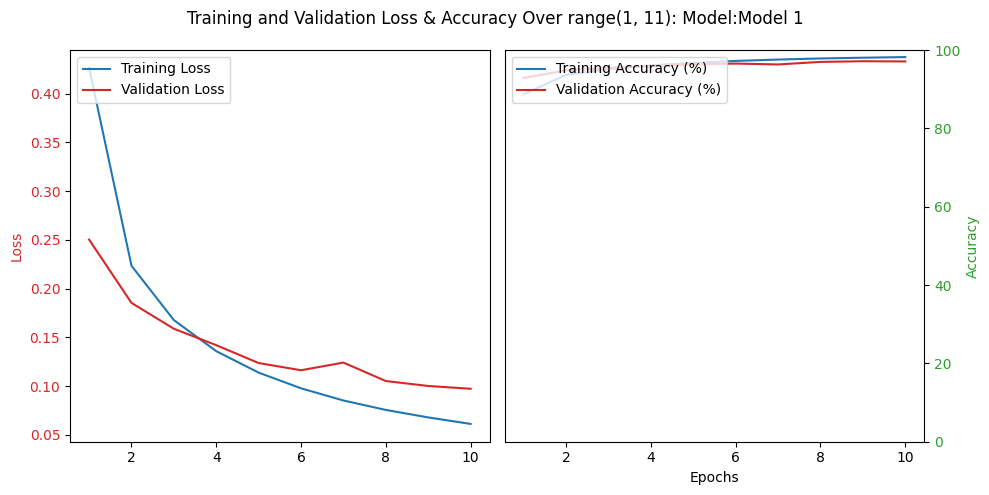

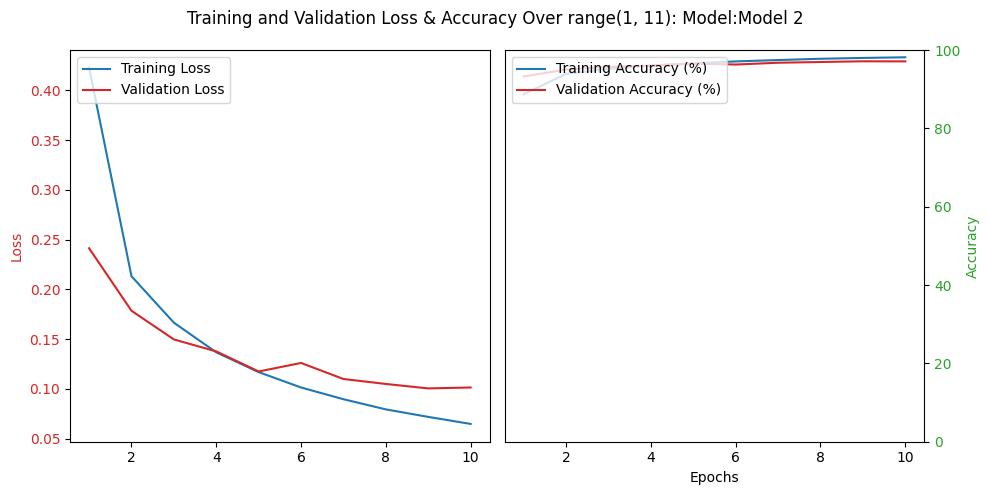

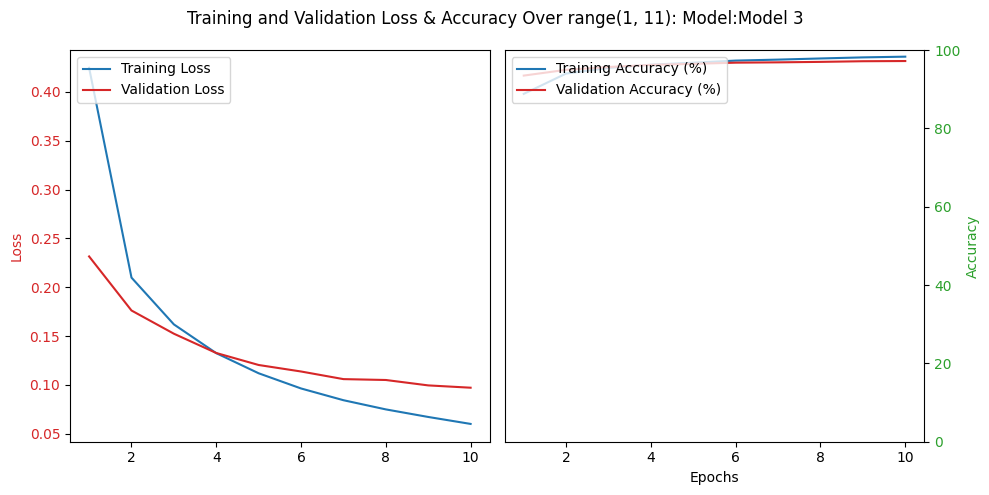

In [14]:
plot_history(history1, 'Model 1')
plot_history(history2, 'Model 2')
plot_history(history3, 'Model 3')

In [5]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
keras.utils.plot_model(model_1,'model1')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
